<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Clustering and Metrics
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2021</b> <br>
    <b>Lab06.01 - 26/05/2021<br>
    Marco Cannici <br>
    <a href="mailto:marco.cannici@polimi.it">marco.cannici@polimi.it</a><br>
    </div>
    </td>
    <td width="100px"> 
        <a href=http://chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio>
        <img align="right", width="100px" src='https://chart.googleapis.com/chart?cht=qr&chl=chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio&chs=180x180&choe=UTF-8&chld=L|0' alt=''>
        </a>
    </td>
</tr>
</table>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
    
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import random
np.random.seed(0)

## Clustering images - small MNIST

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of $28 \times 28$ handwritten digits that is commonly used for training various image processing systems, and is also widely used for training and testing in the field of machine learning. Scikit-learn provides a smaller, and low-resolution, version of MNIST that we can load using the `sklearn.datasets.load_digits` function.

While it is usually used to train supervised classification algorithms, we will use it today for clustering.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
# Extracts images and labels
X = digits.images
y = digits.target

print("X.shape ", X.shape)
print("y.shape ", y.shape)


The dataset contains a total of 1797 images, each of them having size $8 \times 8$ (the small MNIST daatset has fewer samples than the original, which has 60k samples, an smaller images). Let's visualize some of them:

In [ ]:
# Creates a figure composed of 10 rows ans 10 columns, each subfigure
# of size 8x8. subplot_kw={...} disables the x and y values which are
# usually plot below each axis
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# For each subfigure (from 0 to 100 in the 10x10 matrix)
for i, ax in enumerate(axes.flat):
    ax.imshow(..., cmap='binary', interpolation='nearest')
    # Write the label in the bottom-left corner of the figure
    ax.text(0.05, 0.05, str(...),
            transform=ax.transAxes, color='r')

### Data Visualization - Dimensionality reduction

Let's pretend we don't know nothing abount MNIST and let's cosider each image as a vector of $8 \times 8=64$ features. We can try to have a first idea on how samples are organized by visualizing how they are distributed in the space. In order to do that (we can only visualize 3 dimensions!) we have to reduce the number of features! There are a lot of dimensionality reduction algorithms, in this case we will use **PCA**.

We can use PCA to convert the original dataset features (64) into **3 new features** (NB: not a subset of the most important features, but new ones!) and use them as coordinates of a 3D space!

In [ ]:
from sklearn.decomposition import PCA
# Define PCA with 3 components, this will transform 
pca = ...

# We consire images as simple vectors of 64 features
X = ...
# Reduce features dimensionality, just for visualization
# purpuses
X_prj = ...
X_prj.shape

In [ ]:
def plot3d(X, labels):
    # Set matplotlib to generate static images
    # %matplotlib inline
    # Set matplotlib as interactive
    %matplotlib notebook
    # This import is required to set up the 3D environment
    from mpl_toolkits.mplot3d import Axes3D
    
    pca = ...
    # We consire images as simple vectors of 64 features
    X = ...
    # Reduce features dimensionality, just for visualization
    # purpuses
    X = ...
    
    unique_labels = np.unique(labels)
    # Convert negative values (outliers) into positive
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    # Plot the 3d coordinates (similar to standard scatter plots, we just
    # need to provide an additional z coordinate!)
    ax.scatter(xs=..., ys=..., zs=..., c=labels, cmap=cmap)
    # Plot a color bar on the right
    plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels))
    
plot3d(X, labels=y)

By inspecting the graph we can see that:
- Images (in this case points in the 3D space) of the same class seem to aggregate in close regions of the space
- Different classes/cluster seem to be well separated, but may have different densities and shapes
- Similar classes (e.g., 3 and 8) tend to be located in close regions of the space

These observations (the first two) let us conclude that
- A good clustering algorithm, properly tuned, should be able to accurately reconstruct the original clusters.
- From the third observation, moreover, we can predict that similar digits may end up being clustered within the same cluster. 

**Notice** indeed that in this lecture we will deal with **unsupervised algorithms**, that don't have access to the true underlying class of each digit. Their prediction is only driven by how images are similar/dissimilar to each other! We may end up selecting fewer or more clusters, but this does not mean that the clustering is wrong!

# Hierarchical Clustering

Hierarchical clustering (or Agglomerative clustering) is a clustering technique that works by partitioning the points iteratively. A **bottom-up** approach starts by considering singleton clusters (i.e., clusters containing only one sample) and then iteratively merges together the two most similar clusters.

This iterative approach, while in some cases less efficient, allows us to reconstruct the sequence of merges and to build a hierarchy of clusters which is usually called **dendrogram**.

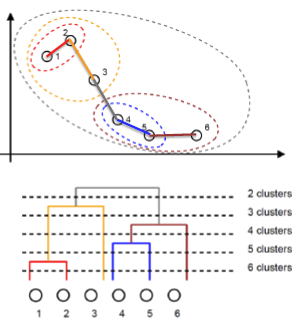

### Linkage Matrix

In scikit-learn we have two ways to perform hierarchical clustering:
- by building the **Linakge Matrix**, i.e., a matrix specifying the sequence of merges
- or by using the usual `fit()` `predict()` API

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = ...

The linkage matrix is a $(N-1) \times 4$ matrix specifying the sequence of merges, from the first one (fir row) to the last one (last row).

Each row contains **four information**:
- `id1`, `id2` are the id of the two samples, or clusters, that have been merged at that particular iteration
- `dist` the distance between `id1`, `id2` before the merge
- `npoints` the number of original observations contained in the cluster after the merge

The `id#` values refer to:
- original points if the value is `id# < len(data)`, 
- or to a cluster otherwise. We can reconstruct the cluster by selecting the linkage row `id# - len(data)`.

In [ ]:
print("X.shape", X.shape)
# Print the first 10 merges
...

For instance, if we look at line $0$, we are inspecting the first merge that is being performed by the algorithm. This is referring to sample id $1585$ and $1648$, which are the two most similar points in the dataset.

In [ ]:
# Compute the linkages row numbers referring 
# to a merge with at least one cluster
...

In [ ]:
# Inspect one of these lines to verify 
print(...)

Line $58$ instead merges id $326$ (a sample, $< 1797$) with $1800$ (a previous cluster, $>= 1797$). If we want to reconstruct which was cluster $1800$ we can inspect line $1800 - 1797 = 3$ 

### Plotting the Dendrogram

Starting from the linkage matrix, we can plot in scikit-learn the **dendrogram** using the `cluster.hierarchy.dendrogram` method. 

In the following function we plot the dendrogram and **add some additional information on the dendrogram intersections**. In particular we mark intersection with their linkage row id, so that we can optionally inspect which nodes are under that part of the dendrogram!

**NOTE:** we chose to identify nodes by negative numbers: $-1$ is the last merge, $-2$ is the last but one merge and so on.

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        # TODO: kwargs['color_threshold'] = #....
        kwargs['color_threshold'] = None
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = ...
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        # if y > annotate_above:
        #     plt.plot(x, y, 'o', c=c)
        #     plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
        #                  textcoords='offset points',
        #                  va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax
   

In [ ]:
# Plot the dendrogram, showing ony the ast 100 merges
# and cutting the dendrogram so that we obtain 10 clusters
plot_dendrogram(Z=..., X=...,
                truncate_mode='lastp', 
                p=100, n_clusters=...)

While the dendrogram is very useful for inspecting the hierarchy and sequence of merges/splits, **it is not very informative if we are not able to determine what are the samples grouped inside each of the clusters**.

However, **using the linkage matrix we can reconstruct the set of points within each cluster!** Remember that the first two values in each row refer to sample/cluster id. We can "backtrack" the sequence of merges and reconstruct the list of samples given a linkage row!

In [ ]:
# Recursively backtrack the dendrogram, collecting
# the list of sample id starting from an initial point
def get_node_leaves(Z, idx, N):
    n1, n2 = Z[idx,0], Z[idx,1]
    leaves = []
    for n in [n1, n2]:
        leaves += ...
    return leaves

# Plot a number of images (at most maxn) under a cluster/sample id
def plot_node(Z, X, y, idx, maxn=15*15):
    leaves = get_node_leaves(Z, idx, X.shape[0])
    labels, counts = np.unique(y[leaves], return_counts=True)
    nleaves = len(leaves)
    print(pd.DataFrame(np.array(counts).reshape(1,-1), 
                       columns=labels, index=["Frequency:"]))
    print("Images in the cluster:", len(leaves), "/", X.shape[0])

    random.shuffle(leaves)
    leaves = leaves[:maxn]
    h = min((nleaves // 15)+1, 15)
    w = nleaves if nleaves < 15 else 15
    
    fig, axes = plt.subplots(h, w, figsize=(w, h),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

    # For each subfigure (from 0 to 100 in the 10x10 matrix)
    for i, ax in enumerate(axes.flat):
        if i < nleaves:
            ax.imshow(..., cmap='binary', interpolation='nearest')
            ax.text(0.05, 0.05, str(...), transform=ax.transAxes, color='r')
        else:
            ax.set_axis_off()

In [ ]:
# Plot the first node
# Remember: we expect only two samples,
# the most similar ones in the dataset!
plot_node(Z, X, y, 0)

As expected, if we inspec the node with id $0$ (first merge), we obtain ony two sample which look almost identical. They are the two most similar samples in the dataset!

Try to plot nodes $-13$ and $-10$, which are later merged together! They refer to samples with class $5$ and $2$, which, also visually, are very similar to each other!

In [ ]:
#...

Notice that The cluster of $5$s, is the resut of merging two subclusters: $-16$ and $-24$. If we inspect them, we see that these correspond to two different ways of writing the five: The first one has a large circle on the $5$ belly, while the second one a smaller and very flattened one.

In [ ]:
#....

The same goes for clusters $-27$ and $-21$, coresponding to the digit $4$. The first represent (almost) "closed" $4$ digits, while the second one "U shaped" $4$s! 

Hierarchical clustering allows us to identify these structure in data! Because of that, a part from a clustering algorithm, it is also **often used as a visualization technique to inspect datasets**.

## Linkage methods

Given a set of clusters, we have different options to decide which of them to merge first. There are mutiple strategies to decide, the best one ofted depend on the dataset!

- **Complete** (maximal intercluster distance): Compute all distances between points in cluster A and cluster B and return the *largest of these distances*.
- **Single** (minimal intercluster distance): As before, but we return the *smallest distance*.
- **Average/Median** (mean intercluster distance): As before, but we return the *average/median of the distances*.
- **Centroid**: We compute the distance of the two clusters as the distance between the two clusters means/centroids.
- **Ward** (minimal inter-cluster variance): Finds the pair of clusters that leads to *minimum increase in total within-cluster variance after merging*

In [ ]:
methods = ['single', 'average', 'complete', 'centroid', 'ward']

for method in methods:
    Z = #...
    fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                              p=100, n_clusters=10)
    ax.set_title(method)

As expected:
- **Single** linkage is the one that provides smaller jumps among all. Not very good in our case where points are all very close to each other. It ends up merging single points into an (each time) larger cluster until coverage
- **Complete** linkage provides generally larger jumps than single and average
- **Centroids** linkage may suffer (as in this case!) of **inversions**. As the centroids move with new observations (after merging), it is possible that the distance between the new cluster and another cluster decreases after the merge. If these two happen to be the next two clusters to be merged, we may see a "jump" downwards in the dendrogram
- **Ward** is generally very stable (default choice for scikit-learn)

### The `AgglomerativeClustering` algorithm


As usual, we can also make use of the standard scikit-learn API. It behaves similarly but also provides the the usual `fit()` and `predict()` methods.

We can either:
- specify a cut point using the `distance_threshold` method
- or the total number of cluster that we want with `n_clusters`. The cut point will be aoutomatically determined. *How to determine it using the linkage matrix?*

In [ ]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold=None#270
n_clusters=10

model = AgglomerativeClustering(...)

y_predict = model.fit_predict(X)

plot3d(X, labels=y_predict)
plot_dendrogram(model=model, X=X, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=distance_threshold)

## Clustering Metrics

### Cluster validity via correlation

We define the **incidence matrix** as an $N \times N$ matrix (where N is the number of sampes) having a $1$ in position $(i, j)$ if the samples $i$ and $j$ have the same *predicted* cluster id. 

We define the **similarity matrix** as an $N \times N$ matrix containing the similarity ($1 - distance$) between each pair of points

The **clustering correlation** is defined as the correlation (normalized dot product, or cosine similairty) between these matrices, seen as two vectors!

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = #... indices of the samples in this cluster
        # Compute combinations of these indices
        idx = ...
        mat[..., ...] = ...
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(...)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = ...
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    # Note: we can eventually remove duplicate values
    # only the upper/lower triangular matrix
    # triuidx = np.triu_indices(y_pred.shape[0], k=1)
    # inc = inc[triuidx]
    # sim = sim[triuidx]
    
    inc = ...
    sim = ...
    corr = ...
    return corr[0,0]   

In [ ]:
correlation(X, y_predict, 'euclidean')

We don't record a very high metric in this case, why? The selected distance metric may not be very good in our case, potentialy affecting also the goodness of our clusters!

**How does it compare with a random clustering?**

In [ ]:
y_rand = ...
correlation(X, y_rand, 'euclidean')

To inspect the similarity matrix and take a look at how much points within the same cluster are distant from each other we can resort to a **sorted similarity matrix**.

We compute the similarity matrix (or distance matrix) as usual, and then order rows and columns in such a way that points with the same cluster id are close to each other.

In [ ]:
def sorted_mat(sim, y_pred):
    idx_sorted = ...
    # Sort the rows
    sim = ...
    # Sort the columns
    sim = ...
    
    return sim

def plot_sorted_mat(sim, y_pred):
    sim = sorted_mat(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])

In [ ]:
# Try to select different distances!
sim = ...
# plot sorted ...

The simiarity matrix should appear as formed by squares that arrange along the main diagonal!

Remember that in our case we have some digits/clusters that contain two or more versions of drawing the same digit, or digits that are very similar to each other!

In [ ]:
# Plot the sorted indicence matrix and compare it with the similarity one
inc = ...
# plot sorted ...

## Deciding the number of clusters

### Dendrogram

The dendrogram shows distances between clusters. We can use this knowledge to decide where to cut. If we see that two cluster were merged despite their distance was very high, we can conclude that that merge was probably not needded

In [ ]:
Z = linkage(X, metric='euclidean', method='ward')
fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                          p=100, n_clusters=0)

### Elbow Analysis

If we don't know the data very well, how can we determine the correct number of clusters? A common technique is called **elbow analysis** and consists in plotting two metrics (**within sum of squares**) and (**between sum of squares**).

- **WSS** = Sum of the distances between any pair of points that are in the same cluster

- **BSS** = Sum of the distances between any pair of points that are in different clusters

We then search for "elbows" in this graph to decide where to cut

In [ ]:
def wss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in the same cluster
    dist_mat = ...
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = #...
    
    wss = ...
    
    return wss

def bss(X, y_pred, metric):
    # Compute the incidence matrix
    inc = incidence_mat(y_pred)
    # Compute the distances between each pair of nodes
    dist_mat = pairwise_distances(X, metric=metric)
    # Use the incidence matrix to select only the 
    # distances between pair of nodes in different clusters
    dist_mat = ...
    # Select the lower/upper triangular part of the matrix
    # excluding the diagonal
    triu_idx = np.triu_indices(X.shape[0], k=1)
    
    bss = ...
    
    return bss

print("WSS", wss(X, y_predict, 'euclidean'))
print("BSS", bss(X, y_predict, 'euclidean'))


- **Sinlhuette score** = A combination of the two. Already provided by `metrics.silhouette_score`

We cut where the silhuette has its maximum

In [ ]:
from sklearn.metrics import silhouette_score

wss_list, bss_list, sil_list = [], [], []
clus_list = list(range(1, 15))

for nc in clus_list:
    model = AgglomerativeClustering(n_clusters=nc,
                                    affinity='euclidean', 
                                    linkage='ward')

    y_predict = model.fit_predict(X)
    
    wss_list.append(wss(X, y_predict, 'euclidean'))
    bss_list.append(bss(X, y_predict, 'euclidean'))
    if nc > 1:
        sil_list.append(silhouette_score(X, y_predict, metric='euclidean'))
    
plt.plot(clus_list, wss_list, label='WSS')
plt.plot(clus_list, bss_list, label='BSS')
plt.legend()
plt.show()

plt.plot(clus_list[1:], sil_list, label='Average silhuette score')
plt.legend()

As expected:
- **BSS** increases as the number of clusters increases: if all points are in the same cluster we don't have anything to sum, if all points are in different clusters we sum all the distances
- **WSS** decreases as the number of clusters increases: the behavior is exactly the opposite as BSS

The silhuette courve is usualy more easy to interpret. In this case it suggests us to cut at $9$ clusters. This translates in merging together $1$s and $8$s digits. Not a very strange choice if you look at some of the MNIST $8$ digits!

In [ ]:
Z = linkage(X, metric='euclidean', method='ward')
fig, ax = plot_dendrogram(Z=Z, X=X, truncate_mode='lastp', 
                          p=100, n_clusters=9)

In [ ]:
plot_node(Z, X, y, ...)

## Precision, Recall and Purity

Metrics defined for classificaton are also defined for clustering. In this case their definition is a little bit different since in clustering we are free to assign cluster ids, it only metters how we split samples, not the cluster id we chose!

**Notice:** we can compute this metrics only if we know the underlying true cluster assignments!

In [ ]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = #...
    Nk_mask = #...
    Nk = #...
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = #...
        Nj = #...
        Nkj = #...
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

In [ ]:
tot_purity(y_predict, y)

We can interpret the purity as a sort of accuracy in classification terms. **How does it compare with a random clustering?** (Should be almost 1/10!)

In [ ]:
#...

## KMeans

KMeans is a representative-based clustering algorithm, meaning that, each cluster is always represented by a single point in the feature space. It is an **iterative** algorithm, that incrementally updates and improve the solution, and, unlike hierarchical clustering, it **needs to know in advantage the final number of clusters**.

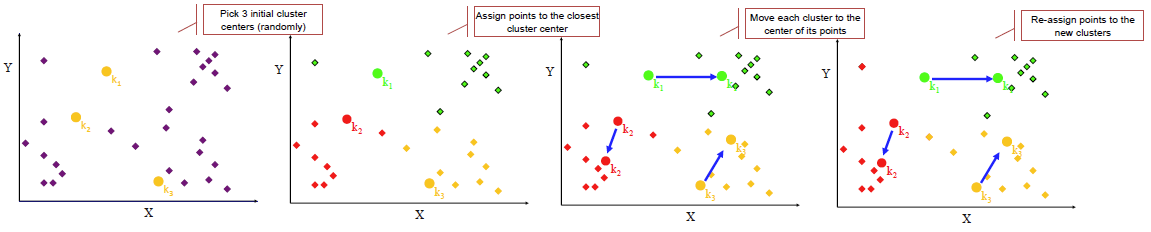

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=..., init=..., random_state=0)             
y_predict = model.fit_predict(X)
print("Kmeans purity", tot_purity(y_predict, y))

plot3d(X, labels=y_predict)

By inspecting the 3D graph, we can see that KMeans identifies clusters with particular shapes, namely **ellipses** (or spheres in 3d) **with axis oriented as the world axis.** This turned out to be a good prior in our case, however, it is not always the case!

### Initialization

Moreover, KMeans performance greatly depends on the **initial points**. If we start wit a cluster point which is far away from the actual points, an close to an outlier, we may end up obtaining a cluster with a single point inisde!

Multiple strategies exists:
- running **hierchical clustering** on a smaller set of points, searching for K cluster, and then initializing KMeans as the centroids identified by hierarchical clustering
- **furthest** initialization: picking K points which are as far as possible for each other (start with a random point, the select the furthest one, the the furthest from the two selected points, and so on)
- **kmeans++**: similar to furthest initialization, but each time we compute the minimum distance $D(x)$ between a point x and one of the selected centroids. Then we randomly select the next one with probability inversally proportional to $D(x)^2$. In other words, we sample points far away with higher probability w.r.t. those close to already selected points

In [ ]:
# Random
model = KMeans(n_clusters=10, init=..., random_state=0)             
print("Random Kmeans purity", tot_purity(model.fit_predict(X), y))

# K-Means++
model = KMeans(n_clusters=10, init=..., random_state=0)             
print("Kmeans++ purity", tot_purity(model.fit_predict(X), y))

# Hierarchical
hmodel = AgglomerativeClustering(n_clusters=10, 
                                 distance_threshold=distance_threshold, 
                                 affinity='euclidean', linkage='complete')
y_predict = #...
centroids = np.stack([... for k in range(10)])
model = KMeans(n_clusters=10, init=..., n_init=1, random_state=0)             
print("Hierarchical+Kmeans purity", tot_purity(model.fit_predict(X), y))

### K-Means limits on synthetic data

While very popular, K-Means ha s a number of problems when clusters:
- have different sizes
- different densities
- non globular shapes
- outliers than do not belong to any cluster

In [ ]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

n_samples = 1500
random_state = 170
# Make 2 circles, one inside the other
noisy_circles = datasets.make_circles(n_samples=n_samples,
                                      factor=.5,
                                      noise=.05,
                                      random_state=random_state)
# Make two moon shaped clusters
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05,
                                  random_state=random_state)
# Make globular shaped clusters
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

# Non globular shaped
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
blobs_non_glob = np.dot(blobs[0], transformation), blobs[1]

# Make uniformly distributed clusters
blobs_variance = datasets.make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

# Collect clusters into a list
# Datasets are a tuple
# data, labels) = (np.ndarray([n_samples, 2]), np.ndarray([n_samples]))
datasets = [noisy_circles, noisy_moons, blobs, blobs_non_glob, blobs_variance]

# We normalize the data so that points are distributed in the same
# range of values. This will help while comparing algorithms
for i in range(len(datasets)):
    Xd, yd = datasets[i]
    Xd = StandardScaler().fit_transform(Xd)
    datasets[i] = (Xd, yd)

print("Original clusters")
for i, (Xd, yd) in enumerate(datasets):
    # Create a figure composed of a grid of (row=1, column=len(datasets))
    # subfigures. Then plot in the (i+1)-th position (positions start from 1)
    ax=plt.subplot(1, len(datasets), i+1, aspect="equal")
    # Set the figure size
    ax.figure.set_size_inches(20, 20)
    # Plot points: scatterplot -> points are NOT connected by lines
    sns.scatterplot(Xd[:, 0], Xd[:, 1], hue=yd, ax=ax)

In [ ]:
# We decide a-priori the number of clusters to search for each dataset
num_clusters = [2, 2, 3, 3, 3]
print("Kmeans clustering")
for i, ((Xd, yd), n) in enumerate(zip(datasets, num_clusters)):
    ax=plt.subplot(1, len(datasets), i+1, aspect="equal")
    ax.figure.set_size_inches(20, 20)
    
    # Fit Kmeans for each dataset
    model = KMeans(n_clusters=n)   # 2- hyperparams
    model.fit(Xd)                   # 3- model fitting (unsupervised, y is not required)
    y_predict = model.predict(Xd)   # 4- model testing
    
    # And show the resulting clusters
    sns.scatterplot(Xd[:, 0], Xd[:, 1], hue=y_predict, ax=ax)

K-Means is able to correctly classify only the third dataset, where cluster ha indeed globular shape, same density and size!

## DBSCAN

DBSCAN is a very powerful algorithm for clustering based on the concept of density and connectivity. It has three major advantages wrt to the previous two algorithms:
- it doesn't need to know the number of clusters in advantage
- it can cluster arbitrary shapes
- it is able to identify and handle outliers

Given `eps` and `MinPts`, we define:
- **core point**: a point having at least `MinPts` points inside a radius of size `eps`. Can be retrieved with `model.core_sample_indices_`
- **border point**: a point having fewer than `MinPts` in  `eps`, but it is inside the neighborhood of a core point
- **noise point**: a point that is neither a core point nor a border point. Clustered with cluster id `-1`

The algorithm starts with a random point p and retrieves all the points which are **density reachable** from p. If p is a core point the cluster is kept and the algorithm moves to the next unvisited point until all points have bees visited.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

model = DBSCAN(eps=20, min_samples=10)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))

print("Number of outliers", ...)
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(..., columns=...)) # eventually index=['']

plot3d(X, labels=y_predict)

## How to choose Eps and MinPts?

We can again resort to gridsearch cross-validation to select an hyperparameters combination that maximizes a metric. We can for example decide to use purity as a metric!

**Notice**: We need to redefine `make_scorer` since the default one requires the algorithm to have a `predict()` method, but some clustering algorithms, as DBSCAN, only have `fit_predict()`

In [ ]:
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'eps': [20], 'min_samples': range(5,20)}
cv = GridSearchCV(..., ..., scoring=..., cv=3)
cv = cv.fit(X, y)

In [ ]:
print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

# Algorithm Comparison

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
Xd, yd = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(Xd, transformation)
aniso = (X_aniso, yd)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    Xd, yd = dataset

    # normalize dataset for easier parameter selection
    Xd = StandardScaler().fit_transform(Xd)

    # ============
    # Create cluster objects
    # ============
    clustering_algorithms = [
        ('KMeans', cluster.KMeans(n_clusters=params['n_clusters'])),
        ('Hierarchical (avg)', cluster.AgglomerativeClustering(
                               n_clusters=params['n_clusters'], linkage='average')),
        ('Hierarchical (single)', cluster.AgglomerativeClustering(
                                  n_clusters=params['n_clusters'], linkage='single')),
        ('Hierarchical (complete)', cluster.AgglomerativeClustering(
                                    n_clusters=params['n_clusters'], linkage='complete')),
        ('Hierarchical (ward)', cluster.AgglomerativeClustering(
                                    n_clusters=params['n_clusters'], linkage='ward')),
        ('DBSCAN', DBSCAN(eps=0.15, min_samples=3)),
    ]

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(Xd)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(Xd)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(Xd[:, 0], Xd[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()